# Simple PageRank Algorithm

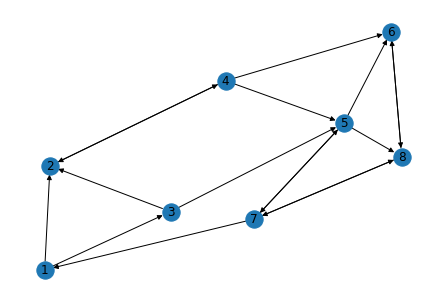

In [36]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [(1,2), (1,3), (2,4), (3,5), (3,2),
     (4,5), (4,2), (4,6), (5,6),(5,7),(5,8),
    (6,8),(7,5),(7,8),(7,1),(8,6),(8,7)])
nx.draw(G,with_labels=True)
plt.savefig('graph1.png', format='PNG')
plt.show()


In [31]:
l=list(G.edges())
n=[]
for i in l:
    if i[0] not in n:
        n.append(i[0])
    if i[1] not in n:
        n.append(i[1])

In [32]:
import numpy as np
H=np.zeros((len(n),len(n)))
d=dict.fromkeys(n)
for i in d:
    d[i]=[]
for i in d:
    for j in l:
        if i==j[0]:
            d[i].append(j)

In [33]:
import pandas as pd
for i in d:
    k=len(d[i])
    for j in d[i]:
        x=j[1]-1
        H[x][i-1]=(1/k)
print(pd.DataFrame(H,index=n,columns=n))

     1    2    3         4         5    6         7    8
1  0.0  0.0  0.0  0.000000  0.000000  0.0  0.333333  0.0
2  0.5  0.0  0.5  0.333333  0.000000  0.0  0.000000  0.0
3  0.5  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0
4  0.0  1.0  0.0  0.000000  0.000000  0.0  0.000000  0.0
5  0.0  0.0  0.5  0.333333  0.000000  0.0  0.333333  0.0
6  0.0  0.0  0.0  0.333333  0.333333  0.0  0.000000  0.5
7  0.0  0.0  0.0  0.000000  0.333333  0.0  0.000000  0.5
8  0.0  0.0  0.0  0.000000  0.333333  1.0  0.333333  0.0


In [10]:
def pagerank_simple(H,m):
    I =np.zeros((len(H),1))
    I[0][0] = 1
    
    for j in range(0,m):
        I = np.dot(H,I)
    return I

In [58]:
print(pd.DataFrame(pagerank_simple(H,100),index=n))

        0
1  0.0600
2  0.0675
3  0.0300
4  0.0675
5  0.0975
6  0.2025
7  0.1800
8  0.2950


# Dangling Nodes

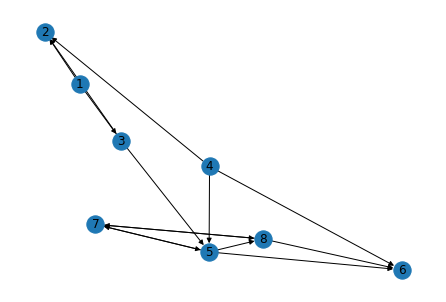

In [38]:
G1= nx.DiGraph()
G1.add_edges_from(
    [(1,2), (1,3), (3,5), (3,2),
    (4,5), (4,2), (4,6), (5,6),(5,7),(5,8),
    (7,5),(7,8),(8,6),(8,7)])
nx.draw(G1,with_labels=True)
plt.savefig('graph2.png')
plt.show()


In [39]:
l1=list(G1.edges())
n1=[]
for i in l1:
    if i[0] not in n1:
        n1.append(i[0])
    if i[1] not in n1:
        n1.append(i[1])
import numpy as np
H1=np.zeros((len(n1),len(n1)))
d1=dict.fromkeys(n1)
for i in d1:
    d1[i]=[]
for i in d1:
    for j in l1:
        if i==j[0]:
            d1[i].append(j)
import pandas as pd
for i in d1:
    k=len(d1[i])
    for j in d1[i]:
        x=j[1]-1
        H1[x][i-1]=(1/k)
print(pd.DataFrame(H1,index=n1,columns=n1))

     1    2    3         5         6    7    8    4
1  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0
2  0.5  0.0  0.5  0.333333  0.000000  0.0  0.0  0.0
3  0.5  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0
5  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0
6  0.0  0.0  0.5  0.333333  0.000000  0.0  0.5  0.0
7  0.0  0.0  0.0  0.333333  0.333333  0.0  0.0  0.5
8  0.0  0.0  0.0  0.000000  0.333333  0.0  0.0  0.5
4  0.0  0.0  0.0  0.000000  0.333333  0.0  0.5  0.0


In [20]:
print(pd.DataFrame(np.around(pagerank_simple(H1,100),4),index=n1))

     0
1  0.0
2  0.0
3  0.0
5  0.0
6  0.0
7  0.0
8  0.0
4  0.0


# Updating H : Probabilistic Interpretation

In [42]:
result = np.all((H1 == 0), axis=0)
A=np.zeros((len(n1),len(n1)))
for i in range(len(result)):
    if result[i]:
        A[:,i]=1/(len(n1))

S=H1+A
print(pd.DataFrame(S,index=n1,columns=n1))

     1      2    3         5         6      7    8    4
1  0.0  0.125  0.0  0.000000  0.000000  0.125  0.0  0.0
2  0.5  0.125  0.5  0.333333  0.000000  0.125  0.0  0.0
3  0.5  0.125  0.0  0.000000  0.000000  0.125  0.0  0.0
5  0.0  0.125  0.0  0.000000  0.000000  0.125  0.0  0.0
6  0.0  0.125  0.5  0.333333  0.000000  0.125  0.5  0.0
7  0.0  0.125  0.0  0.333333  0.333333  0.125  0.0  0.5
8  0.0  0.125  0.0  0.000000  0.333333  0.125  0.0  0.5
4  0.0  0.125  0.0  0.000000  0.333333  0.125  0.5  0.0


In [69]:
print(pd.DataFrame(pagerank_simple(S,100),index=n1))

          0
1  0.038035
2  0.098257
3  0.057052
4  0.038035
5  0.175911
6  0.206022
7  0.193344
8  0.193344


# Rank Sink

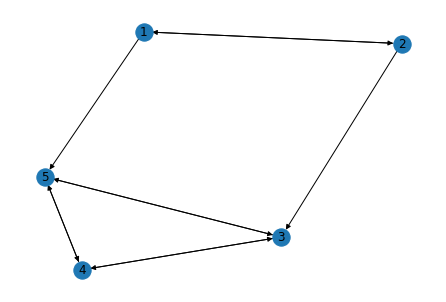

In [46]:
G2= nx.DiGraph()
G2.add_edges_from(
    [(1,2), (1,5), (2,1), (2,3),(3,5),(3,4),
    (4,5), (4,3), (5,4), (5,3)])
nx.draw(G2,with_labels=True)
plt.savefig('graph3.png')
plt.show()


In [47]:
l2=list(G2.edges())
n2=[]
for i in l2:
    if i[0] not in n2:
        n2.append(i[0])
    if i[1] not in n2:
        n2.append(i[1])
import numpy as np
H2=np.zeros((len(n2),len(n2)))
d2=dict.fromkeys(n2)
for i in d2:
    d2[i]=[]
for i in d2:
    for j in l2:
        if i==j[0]:
            d2[i].append(j)
import pandas as pd
for i in d2:
    k=len(d2[i])
    for j in d2[i]:
        x=j[1]-1
        H2[x][i-1]=(1/k)
print(pd.DataFrame(H2,index=n2,columns=n2))

     1    2    5    3    4
1  0.0  0.5  0.0  0.0  0.0
2  0.5  0.0  0.0  0.0  0.0
5  0.0  0.5  0.0  0.5  0.5
3  0.0  0.0  0.5  0.0  0.5
4  0.5  0.0  0.5  0.5  0.0


In [49]:
result = np.all((H2 == 0), axis=0)
A1=np.zeros((len(n2),len(n2)))
for i in range(len(result)):
    if result[i]:
        A1[:,i]=1/(len(n2))

S1=H2+A1
print(pd.DataFrame(S1,index=n2,columns=n2))

     1    2    5    3    4
1  0.0  0.5  0.0  0.0  0.0
2  0.5  0.0  0.0  0.0  0.0
5  0.0  0.5  0.0  0.5  0.5
3  0.0  0.0  0.5  0.0  0.5
4  0.5  0.0  0.5  0.5  0.0


In [13]:
print(pd.DataFrame(np.around(pagerank_simple(S1,100),4),index=n2))

        0
1  0.0000
2  0.0000
5  0.3333
3  0.3333
4  0.3333


# Modified Page Rank Algorithm : Random Surfing

In [51]:
def pagerank(S,alpha,m):
    I = np.zeros((len(S),1))
    I[0][0] = 1
    J = np.ones((len(S),len(S)))
    G = (alpha*S)+(((1-alpha)/len(S))*J)
    for j in range(0,m):
        I = np.dot(G,I)
    return I

In [23]:
print(pd.DataFrame(np.around(pagerank(S1,0.85,100),4),index=n2))

        0
1  0.0522
2  0.0522
5  0.3037
3  0.2882
4  0.3037


# Including Error Calculation for convergence

In [28]:
def pagerank_1(S,alpha=0.85,m=100,tol=0.0001):
    I = np.zeros((len(S),1))
    I[0][0] = 1
    J = np.ones((len(S),len(S)))
    G = (alpha*S)+(((1-alpha)/len(S))*J)
    for j in range(0,m):
        Ilast=I
        I = np.dot(G,I)
        err = sum([abs(I[n] - Ilast[n]) for n in range(len(I))])
        if err < len(I)*tol:
            print("converged after ",j," steps")
            return I
    return I

In [29]:
pagerank_1(S1)

converged after  13  steps


array([[0.05217986],
       [0.05217359],
       [0.30377961],
       [0.28817516],
       [0.30369179]])

In [68]:
def pagerank_2(S,alpha=0.85,m=500,tol=0.0001):
    I = np.zeros((len(S),1))
    I[0][0] = 1
    J = np.ones((len(S),len(S)))
    G = (alpha*S)+(((1-alpha)/len(S))*J)
    for j in range(0,m):
        Ilast=I
        I = np.dot(G,I)
        err = sum([abs(I[n] - Ilast[n]) for n in range(len(I))])
        if err < len(I)*tol:
            return j

# Change of convergance value with respect to alpha and number of webpages

In [69]:
list_n=list(range(4,250))
list_converge=[]
for x in list_n:
    g = nx.scale_free_graph(x)
    l=list(g.edges())
    nn=[]
    for i in l:
        if i[0] not in nn:
            nn.append(i[0])
        if i[1] not in n:
            nn.append(i[1])
    H=np.zeros((len(nn),len(nn)))
    d=dict.fromkeys(list(range(len(nn))))
    for a in d:
        d[a]=[]
    for b in d:
        for c in l:
            if b==c[0]:
                d[b].append(c)
    for i in d:
        k=len(d[i])
        for j in d[i]:
            H[j[1]][i]=(1/k)
    result = np.all((H == 0), axis=0)
    A=np.zeros((len(nn),len(nn)))
    for i in range(len(result)):
        if result[i]:
            A[:,i]=1/(len(nn))

    S=H+A
    list_converge.append(pagerank_2(S))
    
    


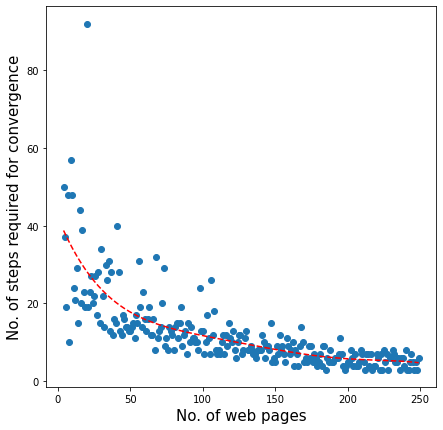

In [99]:

import matplotlib.pyplot as plt
  
x = list_n
y = list_converge
plt.figure(figsize=(7,7))  
plt.scatter(x, y)
plt.xlabel("No. of web pages",fontsize=15)
plt.ylabel("No. of steps required for convergence",fontsize=15)

z = np.polyfit(x, y, 5)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.savefig("plot3.png")
plt.show()

In [95]:
z=list(range(1000,600,-1))
list_alpha=[i/1000 for i in z]
list_converge2=[]

g = nx.scale_free_graph(10)
l=list(g.edges())
nn=[]
for i in l:
    if i[0] not in nn:
        nn.append(i[0])
    if i[1] not in n:
        nn.append(i[1])
H=np.zeros((len(nn),len(nn)))
d=dict.fromkeys(list(range(len(nn))))
for a in d:
    d[a]=[]
for b in d:
    for c in l:
        if b==c[0]:
            d[b].append(c)
for i in d:
    k=len(d[i])
    for j in d[i]:
        H[j[1]][i]=(1/k)
result = np.all((H == 0), axis=0)
A=np.zeros((len(nn),len(nn)))
for i in range(len(result)):
    if result[i]:
        A[:,i]=1/(len(nn))

S=H+A
for x in list_alpha:
    list_converge2.append(pagerank_2(S,alpha=x))
    

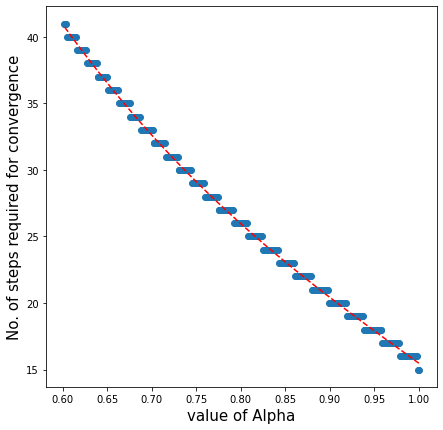

In [98]:

import matplotlib.pyplot as plt
  
x1 = list_alpha
y1 = list_converge2
plt.figure(figsize=(7,7))  
plt.scatter(x1, y1)
plt.xlabel("value of Alpha",fontsize=15)
plt.ylabel("No. of steps required for convergence",fontsize=15)

z1 = np.polyfit(x1, y1, 3)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"r--")
plt.savefig("plot4.png")
plt.show()